## GReaT Example with Iris Dataset

In [3]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [4]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

In [5]:
from utils import set_logging_level
from be_great import GReaT

c:\Users\Ben\Documents\UCL\PhD\Research\LLMs_and_fairness\be_great_fairness\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import matplotlib.pyplot as plt

In [7]:
logger = set_logging_level(logging.INFO)

### Load Data

In [8]:
data = datasets.load_iris(as_frame=True).frame
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
data.columns = ["sepal length", "sepal width", "petal length", "petal width", "target"]

### Create GReaT Model

In [12]:
great = GReaT("distilgpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=10,                   # Number of epochs to train
              save_steps=2000,               # Save model weights every x steps
              logging_steps=10,             # Log the loss and learning rate every x steps, original=500
              experiment_dir="trainer_iris", # Name of the directory where all intermediate steps are saved
              batch_size=16,                 # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
             )

### Start Training

In [13]:
trainer = great.fit(data)

2023-10-27 15:24:45,590 - INFO - Convert data into HuggingFace dataset object... (great.py:153)
2023-10-27 15:24:45,595 - INFO - Create GReaT Trainer... (great.py:158)
2023-10-27 15:24:45,872 - INFO - Start training... (great.py:174)
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
                                                
 45%|████▌     | 45/100 [00:39<00:19,  2.81it/s]

{'loss': 2.099, 'learning_rate': 4.5e-05, 'epoch': 1.0}


                                                
 45%|████▌     | 45/100 [00:51<00:19,  2.81it/s]

{'loss': 1.0568, 'learning_rate': 4e-05, 'epoch': 2.0}


                                                
 45%|████▌     | 45/100 [01:04<00:19,  2.81it/s]

{'loss': 0.8749, 'learning_rate': 3.5e-05, 'epoch': 3.0}


                                                
 45%|████▌     | 45/100 [01:16<00:19,  2.81it/s]

{'loss': 0.8084, 'learning_rate': 3e-05, 'epoch': 4.0}


                                                
 45%|████▌     | 45/100 [01:28<00:19,  2.81it/s]

{'loss': 0.7513, 'learning_rate': 2.5e-05, 'epoch': 5.0}


                                                
 45%|████▌     | 45/100 [01:40<00:19,  2.81it/s]

{'loss': 0.7205, 'learning_rate': 2e-05, 'epoch': 6.0}


                                                
 45%|████▌     | 45/100 [01:52<00:19,  2.81it/s]

{'loss': 0.6855, 'learning_rate': 1.5e-05, 'epoch': 7.0}


                                                
 45%|████▌     | 45/100 [02:04<00:19,  2.81it/s]

{'loss': 0.6714, 'learning_rate': 1e-05, 'epoch': 8.0}


                                                
 45%|████▌     | 45/100 [02:16<00:19,  2.81it/s]

{'loss': 0.6614, 'learning_rate': 5e-06, 'epoch': 9.0}


                                                
                                                 
100%|██████████| 100/100 [02:00<00:00,  1.21s/it]

{'loss': 0.6606, 'learning_rate': 0.0, 'epoch': 10.0}
{'train_runtime': 120.746, 'train_samples_per_second': 12.423, 'train_steps_per_second': 0.828, 'train_loss': 0.8989808559417725, 'epoch': 10.0}


In [14]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 120.746,
 'train_samples_per_second': 12.423,
 'train_steps_per_second': 0.828,
 'total_flos': 13396561920000.0,
 'train_loss': 0.8989808559417725,
 'epoch': 10.0,
 'step': 100}

In [15]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

In [16]:
loss_hist

[{'loss': 2.099, 'learning_rate': 4.5e-05, 'epoch': 1.0, 'step': 10},
 {'loss': 1.0568, 'learning_rate': 4e-05, 'epoch': 2.0, 'step': 20},
 {'loss': 0.8749, 'learning_rate': 3.5e-05, 'epoch': 3.0, 'step': 30},
 {'loss': 0.8084, 'learning_rate': 3e-05, 'epoch': 4.0, 'step': 40},
 {'loss': 0.7513, 'learning_rate': 2.5e-05, 'epoch': 5.0, 'step': 50},
 {'loss': 0.7205, 'learning_rate': 2e-05, 'epoch': 6.0, 'step': 60},
 {'loss': 0.6855, 'learning_rate': 1.5e-05, 'epoch': 7.0, 'step': 70},
 {'loss': 0.6714, 'learning_rate': 1e-05, 'epoch': 8.0, 'step': 80},
 {'loss': 0.6614, 'learning_rate': 5e-06, 'epoch': 9.0, 'step': 90},
 {'loss': 0.6606, 'learning_rate': 0.0, 'epoch': 10.0, 'step': 100}]

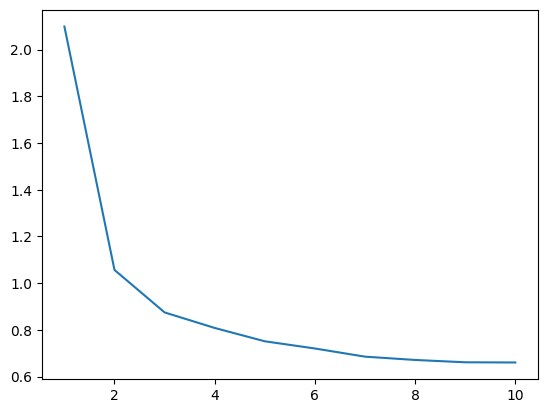

In [17]:
plt.plot(epochs, loss)

### Save Model

In [18]:
great.save("iris_small")

c:\Users\Ben\Documents\UCL\PhD\Research\LLMs_and_fairness\be_great_fairness\be_great\great.py:430: UserWarning: Directory iris_small already exists and is overwritten now.
  warnings.warn(f"Directory {path} already exists and is overwritten now.")


### Load Model

In [14]:
# great = GReaT.load_from_dir("iris")

### Generate Samples

In [19]:
n_samples = 150

In [20]:
samples = great.sample(n_samples, k=50)

197it [00:20,  9.50it/s]


In [21]:
samples.head()

,sepal length,sepal width,petal length,petal width,target
0,5.4,2.0,5.8,0.8,1.0
1,5.0,3.4,0.2,1.2,1.0
2,4.7,2.8,6.9,1.6,2.0
3,6.2,3.4,1.5,3.0,2.0
4,5.6,2.0,6.9,1.5,0.0


In [22]:
samples.to_csv("iris_samples_small.csv")

We can also influence the distribution of the column on which the generation is conditioned (In the original dataset all three target values (0, 1, 2) have a probability of 33%).

In [23]:
samples_custom = great.sample(n_samples, k=50, start_col="target",
                              start_col_dist={"0": 0.5, "1": 0.5, "2": 0})

197it [00:22,  8.65it/s]


In [24]:
samples_custom.head()

,sepal length,sepal width,petal length,petal width,target
0,5.9,3.3,1.2,0.2,0.0
1,6.0,3.1,1.2,2.5,0.0
2,5.7,0.1,1.4,1.4,0.0
3,6.5,2.3,4.3,0.3,0.0
4,5.7,3.4,5.5,1.6,1.0


## Plot Data

Original Data

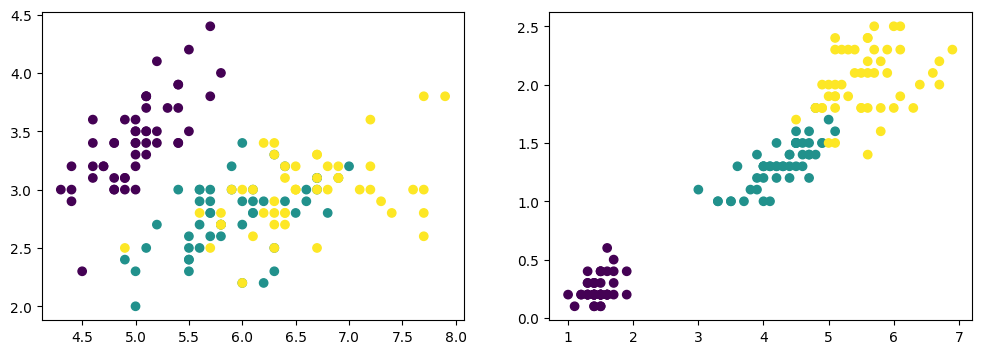

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(data["sepal length"], data["sepal width"], c=data["target"])
ax[1].scatter(data["petal length"], data["petal width"], c=data["target"])

Generated samples

In [26]:
samples = pd.read_csv("iris_samples_small.csv")

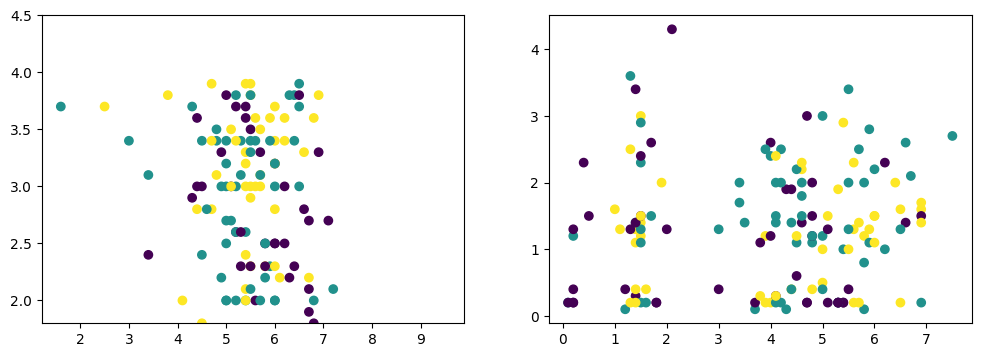

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["sepal length"], samples["sepal width"], c=samples["target"].astype("int"))
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["petal length"], samples["petal width"], c=samples["target"].astype("int"))